In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft
from scipy import signal

from IPython.display import Audio

In [1]:
# PLOTTF
# Plot sampled signal in time and frequency domains. Plots the time-domain
# samples in vector x, assuming that Fs is an audio sampling rate
# (44.1k, 48k, etc.) in samples/second, and also plots the Fourier transform
# on the decibel scale between the frequencies of 20 Hz and 20 kHz,
# logarithmically spaced.
#
# See also PLOT

def plottf(x, Fs):

    Ts = 1/Fs
    N = len(x)
    t = np.arange(0, N) * 1/Fs

    plt.subplot(2, 1, 1)
    plt.plot(t, x)
    plt.xlabel('Time (sec.)')
    plt.ylabel('Amplitude')

    # Fourier Transform
    length = N
    if length < 4096:
        length = 4096

    X = (2/N) * fft(x, n=length) # do DFT/FFT
    f = np.arange(0, length) * (Fs / length)

    X[abs(X) < 0.000001] = 0.000001

    plt.subplot(2, 1, 2)
    plt.semilogx(f, 20 * np.log10(abs(X)))
    plt.axis([20, 20000, -60, 4])
    plt.xticks([20, 50, 100, 200, 300, 500, 1000, 2000, 5000, 10000, 20000], [20, 50, 100, 200, 300, 500, 1000, 2000, 5000, 10000, 20000])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude (dB)')
    plt.show()


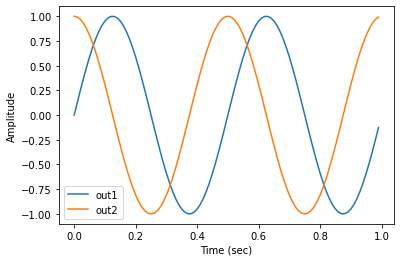

In [20]:
# SINESYNTHESIS
# This script demonstrates two methods to synthesize sine waves
#
# Method 1: A loop is used to step through each element of the
# arrays.
#
# Method 2: Array processing is used to perform element-wise
# referencing by the 'sin' function internally.
#
# See also SINEANGLE, SINESPECTRUM

# Example - Sine wave signal
# Declare initial parameters
f = 2 # frequency in Hz
phi = 0 # phase offset
Fs = 100 # sampling rate
Ts = 1/Fs # sampling period
lenSec = 1 # 1 second long signal
N = Fs * lenSec # convert to time samples
out1 = np.zeros([N,1])

# Method 1: Loop to perform element-wise referencing
for n in range(N):
    t = n * Ts
    out1[n] = np.sin(2 * np.pi * f * t + phi)

# Method 2: Create a signal using array processing
# Phase shifted signal of identical frequency
t = np.arange(0, N) * Ts
out2 = np.sin(2 * np.pi * f * t + np.pi/2)

plt.plot(t, out1, t, out2)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(['out1', 'out2'])
plt.show()

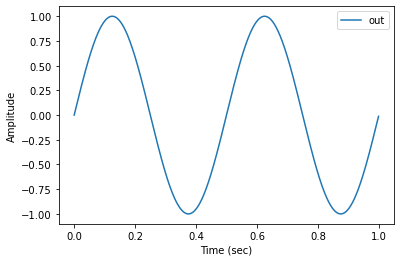

In [21]:
# SINEANGLE
# This script demonstrates a method to synthesize sine waves
# using an angle of rotation
#
# See also SINESYNTHESIS

# Declare initial parameters
f = 2 # frequency in Hz
phi = 0 # phase offset
Fs = 1000 # sampling rate
Ts = 1/Fs # sample period
lenSec = 1 # seconds
N = Fs * lenSec # number of samples
t = np.arange(0, N) * Ts # array of sample times

# Calculate angle of rotation
angleChange = f*Ts*2*np.pi
currentAngle = phi

out = np.zeros([N,1])
# Update the value of the currentAngle each iteration through loop
for n in range(N):
    out[n][0] = np.sin(currentAngle)
    # Update phase angle for next loop
    currentAngle += angleChange

    if currentAngle > 2 * np.pi: # Ensure angle is not > 2*pi
        currentAngle -= 2 * np.pi

# Plot synthesized signal
plt.plot(t, out)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(['out'])
plt.show()

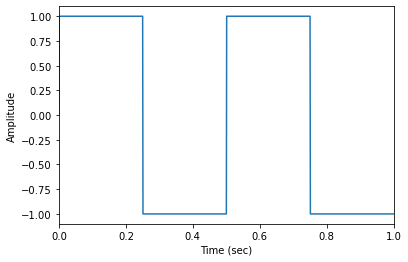

In [13]:
# SQUARESYNTHESIS
# This script demonstrates the a square wave
#
# See also SINESYNTHESIS, SAWTOOTHSYNTHESIS, TRIANGLESYNTHESIS

# Example - Square wave signal
# 2 Hz square wave for visualization
f = 2
phi = 0
Fs = 1000
Ts = 1/Fs
lenSec = 1 # seconds
N = Fs * lenSec
t = np.arange(0, N) * Ts
squareWave = np.sign(np.sin((2 * np.pi * f * t) + phi))

plt.plot(t, squareWave)
plt.axis([0, 1, -1.1, 1.1])
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

# 880 Hz square wave for audition
f = 880
Fs = 44100
Ts = 1/Fs
numSec = 3
N = Fs * numSec
t = np.arange(0, N) * Ts
squareWave = np.sign(np.sin((2 * np.pi * f * t) + phi))
Audio(squareWave, rate=Fs)

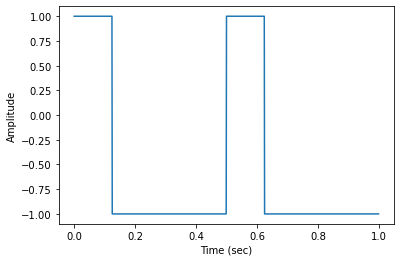

In [30]:
# DUTYCYCLE
# This script synthesizes a square wave with an asymmetrical
# duty cycle
#
# See also SQUARESYNTHESIS

# Example - Duty cycle = 25
f = 3
Fs = 1000
Ts = 1/Fs
numSec = 1
N = Fs * numSec
t = np.arange(0, N) * Ts
duty = 0.25
sq = signal.square((2 * np.pi * f * t), duty)
plt.plot(t, sq)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

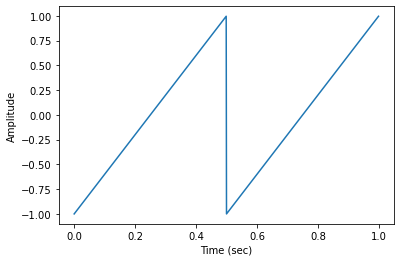

In [31]:
# SAWTOOTHSYNTHESIS
# This script demonstrates the 'sawtooth' function.
#
# See also SINESYNTHESIS, SQUARESYNTHESIS, TRIANGLESYNTHESIS

# Example - Sawtooth wave signal
# 4 Hz signal for visualization
f = 4
phi = 0
Fs = 40
Ts = 1/Fs
numSec = 1
N = Fs * numSec
t = np.arange(0, N) * Ts
sq = signal.square((2 * np.pi * f * t), duty)
sawtoothWave = signal.sawtooth(2 * np.pi * f * t)
plt.plot(t, sawtoothWave)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

# 880 Hz square wave for audition
f = 880
Fs = 44100
Ts = 1/Fs
numSec = 3
N = Fs * numSec
t = np.arange(0, N) * Ts
sawtoothWave = signal.sawtooth(2 * np.pi * f * t)
Audio(sawtoothWave, rate=Fs)

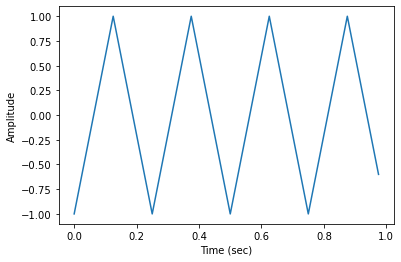

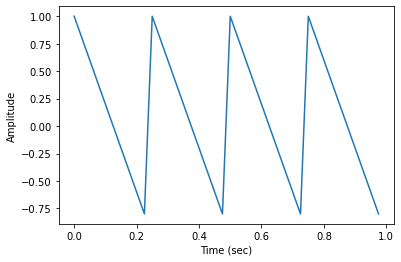

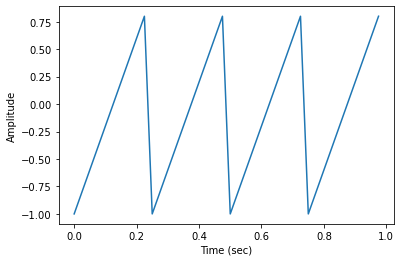

In [2]:
# TRIANGLESYNTHESIS
# This script demonstrates a method to transform the 'sawtooth'
# function to a triangle wave
#
# See also SINESYNTHESIS, SAWTOOTHSYNTHESIS, SQUARESYNTHESIS

# Example - Triangle wave signal
# 4 Hz signal for visualization
f = 4
phi = 0
Fs = 40
Ts = 1/Fs
numSec = 1
N = Fs * numSec
t = np.arange(0, N) * Ts

# Triangle wave => peak occurs at half (0.5) of cycle length
width = 0.5
triangleWave = signal.sawtooth(2 * np.pi * f * t + phi, width)
plt.plot(t, triangleWave)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

# Sawtooth with peak at beginning of cycle, then decreasing amp
width = 0
triangleWave = signal.sawtooth(2 * np.pi * f * t + phi, width)
plt.plot(t, triangleWave)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

# Sawtooth with increasing amp during cycle, peak at end
width = 1
triangleWave = signal.sawtooth(2 * np.pi * f * t + phi, width)
plt.plot(t, triangleWave)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

# 880 Hz square wave for audition
f = 880
Fs = 44100
Ts = 1/Fs
numSec = 3
N = Fs * numSec
t = np.arange(0, N) * Ts
sawtoothWave = signal.sawtooth(2 * np.pi * f * t, 0.5)
Audio(sawtoothWave, rate=Fs)

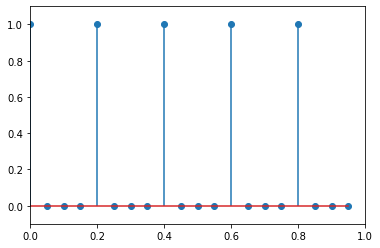

In [7]:
# IMPULSETRAIN
# This script demonstrates a method to create an impulse train
# signal. Initially, all values of the signal are set to zero.
# Then, individual samples are changed to a value of 1 based
# on the length of a cycle's period.

# Example - Impulse Train Signal
# 5 Hz signal for visualization
Fs = 20
f = 5
Ts = 1/Fs
t = np.arange(0, Fs) * Ts # time vector

impTrain = np.zeros(np.size(t)) # Initialize to all zeros
period = round(Fs/f) # # of samples/cycle
# Change the single sample at the start of cycle to 1
impTrain[0::period] = 1
plt.stem(t, impTrain)
plt.axis([0, 1, -0.1, 1.1])
plt.show()

# Example - 440 Hz signal for audition
f = 440
Fs = 48000
Ts = 1/Fs
t = np.arange(0,3*Fs) * Ts
it = np.zeros(np.size(t))
period = round(Fs/f) # # of samples/cycle
it[0::period] = 1
Audio(it, rate=Fs) # Listen to signal

# # 50 Hz signal for spectrum plot
# f = 50
# Fs = 48000
# Ts = 1/Fs
# t = np.arange(0,1*Fs) * Ts
# it = np.zeros(np.size(t))
# period = round(Fs/f)
# it[0::period] = 1
#
# plt.subplot(2,1,1)
# plt.plot(t, it)
# plt.xlabel('Time (sec.)')
# plt.ylabel('Amplitude')
# plt.figure()
#
# X = fft.fft(it)
# Xfreq = fft.fftfreq(it.size, d = Ts)
# Xabs = (2/len(X)) * np.abs(X)  # Normalization
#
# plt.subplot(2,1,2)
# plt.plot(Xfreq[:20000], 20 * np.log10(Xabs[:20000]))
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude (dB)')
# plt.show()

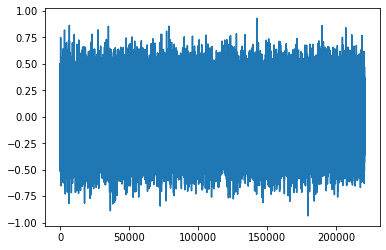

In [5]:
# WHITENOISE
# This script synthesizes a white noise signal by using a
# Gaussian random number generator. Gaussian random numbers are
# also described as normally distributed random numbers. The
# function 'np.random.normal' creates random numbers based on a
# normal distribution.

Fs = 44100 # Sampling rate
sec = 5 # Desired length in seconds
samples = Fs * sec # Convert length to samples

# Next, synthesize noise. The scalar (0.2) is to reduce the
# amplitude of the signal to within the full-scale range. An
# additional option would be to perform peak normalization to
# ensure the amplitude is always between -1 and 1.
noise = 0.2 * np.random.normal(size=[samples])
plt.plot(noise)
plt.show()
Audio(noise, rate=Fs)
